# 🧱 PART 1: Modular Design – Robotics Control Framework (30 pts)

Design a modular control system for a mobile robot using **abstraction, encapsulation, and composition**.
### ✅ Requirements:

- Create an abstract class `Sensor` with an abstract method `read()` and a concrete method `calibrate()`.
- Implement two sensors:
    - `UltrasonicSensor` (returns random value between 10–100 cm)
    - `LidarSensor` (returns random value between 5–80 cm)
- Create a `MotorController` class with private attributes:
    - `__speed` (0–100), `__direction` ("forward", "backward", "stop")
    - Methods: `set_speed()`, `set_direction()`, and `status()`

### 🤖 Robot Class:

- Composed of:
    - One sensor (passed during instantiation)
    - One motor controller
- Method: `navigate()`
    
    Logic:
    
    - If `sensor.read() < 25`, stop the robot.
    - If `25 <= distance <= 60`, go forward at 40.
    - If `distance > 60`, go forward at 80.

📌 Use **super()** in sensor subclasses. Include error handling for invalid motor states.

---

## **PART 1 - SOLUTION**

In [ ]:
# Import necessary dependecies
import numpy as np #for numeric manipulation
import random #for random number generation 
from abc import ABC, abstractmethod #for abstraction classes and methods creation

In [ ]:
# All Custom Errors - Inherit from Exception Class
# Motor speed input out of range Error
class SpeedError(Exception):
    pass

# Motor direction input incompatible Error
class DirectionError(Exception):
    pass

# Navigation method Error
class NavigationError(Exception):
    pass

In [ ]:
# Abstract class - general for sensors - forcing structure and overwriting for abstract methods
class Sensor:
    """
    Abstract base class representing a generic sensor.

    Methods:
        read(): Abstract method for reading a sensor (for overwritting).
        calibrate(): Concrete method for calibrating a sensor.
        
    This class is meant to be subclassed. 
    
    Subclasses must implement the 'read()' method (abstract), 
    to provide the specific sensor data recollection processes required.
    """
    
    @abstractmethod
    def read(self): #read does not require input #Abstract method
        """
        Abstract method for reading a sensor. Overwrite.
        
        Must be implemented/overwritten by all subclasses.
        """
        print("Abstract read() method for Sensor class")
        # this is example for behavior, since we want value back, 
        # return will be in concrete classes implementation

    
    def calibrate(self):
        """
        Concrete method for calibrating a sensor.
        
        Universal for all subclasses.
        """
        print("Calibrating...") #no return, just does the job
        # The calibrating process would be defined here.

In [ ]:
# Sensor Subclass 1 - Rewriting read() method, due to abstraction source 
class UltrasonicSensor(Sensor):
    """
    Represents/Simulates an ultrasonic sensor.

    Methods (inherited from Sensor):
        read(): Inherits Sensor.read() and extends it to an ultrasonic sensor case; simulates ultrasonic readings.
    """
    
    def read(self): #Simulate random sensor reading (no input variable, sensor GIVES you the readings)
        """
        read(): Inherits Sensor.read() and extends it to an ultrasonic sensor case; simulates ultrasonic readings.
        
        Returns:
            float: Simulates ultrasonic sensor readings/measurements (10 to 100 cm).
        """
        super().read() #Inherit from Sensor class, and extends         
        # Change rounding regarding the real sensor's precision (smallest measurement).
        return round(random.uniform(10, 100 + 0.01), 2) #cm 

In [ ]:
# Sensor Subclass 2 - Rewriting read() method, due to abstraction source
class LidarSensor(Sensor):
    """
    Represents/Simulates a lidar sensor.

    Methods (inherited from Sensor):
        read(): Inherits Sensor.read() and extends it to a lidar sensor case; simulates lidar readings.    
    """
    
    def read(self):
        """
        Inherits Sensor.read() and extends it to an lidar sensor case; simulates lidar readings.
        
        Returns:
            float: Simulates lidar sensor readings/measurements (5 to 80 cm).
        """
        super().read() #Inherit from Sensor class, and extends  
        # Change rounding regarding the real sensor's precision.
        return round(random.uniform(5, 80 + 0.01), 2) #cm 

In [ ]:
# Motor control main class
class MotorController:
    """
    Represents/Simulates a motor controller.

    Methods:
        set_speed(): Sets the motor's speed within a failsafe (0 - 100).
        set_direction(): Sets the motor's direction from specified choices ("foward","backward", and "stop").
        status(): Prints values of speed and direction of the motor object. 
    """
    
    def __init__(self):
        """
        Initialize a MotorController instance/object.
        
        Starts the motor static, completly still.
        
        Cannot set the motor's properties at object creation,
        have to utilize the set_speed and set_direction methods.
        Does not take arguments, no input parameters.

        """
        self.__speed = 0.00
        self.__direction = "stop" 

    
    def set_speed(self,speed): #Has to have place for input of variable
        """
        Sets the motor's speed within a failsafe (0 - 100).

        Inputs:
            speed (int/float): Motor controller's input speed value. 
            
        Raises:
            SpeedError: If 'speed' is less than 0 or greater than 100.
        """ 
        if (speed >= 0 and speed <= 100):
            self.__speed = speed  
        elif (speed < 0 or speed > 100):
            raise SpeedError("Motor speed input error. Motor speed out of safe range. ")      

    
    def set_direction(self,direction):
        """
        Sets the motor's direction from specified choices ("foward","backward", and "stop").

        Inputs:
            direction (str): Specifies motor's directions; not case sensitive.
            
        Raises:
            DirectionError: If 'direction' does not match "foward", "backward" or "stop". 
        """
        direction = direction.lower() #To avoid lettercase sensitivity errors
        if (direction == "foward" or direction == "backward" or direction == "stop"): #Correct Case
            self.__direction = direction #Cannot be accessed from OUTSIDE
        else: 
            raise DirectionError("Direction input error.")

    
    def status(self): #No input parameter 
        """Prints values of __speed and __direction of the motor object."""
        print(
            f"---Motor Status Report---\n"
            f"Speed: {self.__speed} m/s (meter(s) per second).\n" #Specify units of velocity per use case
            f"Direction: {self.__direction}."
            )

In [ ]:
# Robot Class
class Robot:
    """
    Represents/Simulates a robot with sensor and motor controller.

    Inputs:
        sensor (Sensor): Object created from a subclass of the abstract Sensor class.

    Attributes:
        sensor (Sensor): Object created from a subclass of the abstract Sensor class.
        motor_controller (MotorController): Object created from MotorController class. 

    Methods:
        navigate(): Decides robot's speed and direction, depending on sensor readings.
    """
    
    def __init__(self,sensor:Sensor): #Specify class type for input paramenter
        """
        Initializes a Robot instance.

        Inputs:
            sensor (Sensor): Object created from a subclass of the abstract Sensor class.
        """
        self.sensor = sensor #This is a Sensor Class object; can access Sensor class methods
        self.motor_controller = MotorController() #Atrribute instantiated from MotorContoller Class 
        
    
    def navigate(self):
        """
        Decides robot's speed and direction, depending on sensor readings.

        Raises:
            NavigationError: In case something goes wrong, since ranges are encompasing.
        """
        # Measure ONLY at the beginning, if not true value cannot be known (If not variable, value is not stored from return of function).
        sensor_value = self.sensor.read()
        print(sensor_value) #FOR TESTING/VERIFICATION
        
        # Stop condition (0,'stop') #Sensor value < 25, excluding.
        if (sensor_value < 25):
            self.motor_controller.set_speed(0)
            self.motor_controller.set_direction("stop")

        # Foward at 40 condition 25 <= distance <= 60 #Sensor value range 25-60, including limits.
        elif (sensor_value >= 25 and sensor_value <= 60):
            self.motor_controller.set_speed(40)
            self.motor_controller.set_direction("foward")

        # Foward at 80 condition #Sensor value > 60, excluding value.
        elif (sensor_value > 60):
            self.motor_controller.set_speed(80)
            self.motor_controller.set_direction("foward")
    
        # Error Case, in case anything goes wrong. Should not run for any reason.
        else:  
           raise NavigationError("Navigation Error, verify.")

### PART 1 TESTING CASES - OUTPUTS

In [ ]:
# Testing UltrasonicSensor Object Generation and Method
my_ultrasonic = UltrasonicSensor() #Create a UltrasonicSensor class type object
print(my_ultrasonic.read())
print(my_ultrasonic.read())
print(my_ultrasonic.read())
my_ultrasonic.calibrate()

Abstract read() method for Sensor class
45.95
Abstract read() method for Sensor class
65.71
Abstract read() method for Sensor class
35.6
Calibrating...


In [ ]:
# Testing LidarSensor Object Generation and Method 
my_lidar = LidarSensor()
print(my_lidar.read())
print(my_lidar.read())
print(my_lidar.read())
my_lidar.calibrate()

Abstract read() method for Sensor class
32.23
Abstract read() method for Sensor class
19.38
Abstract read() method for Sensor class
26.83
Calibrating...


### TESTING MOTORCONTROLLER OUTPUTS

In [ ]:
# Testing MotorController ---
my_motor_controller = MotorController()
my_motor_controller.status() #Verifying initial values, should be 0 and stop

---Motor Status Report---
Speed: 0.0 m/s (meter(s) per second).
Direction: stop.


In [ ]:
# Correct Case Testing 
my_motor_controller.set_speed(99.0)
my_motor_controller.set_direction("FowaRd")
my_motor_controller.status()

---Motor Status Report---
Speed: 99.0 m/s (meter(s) per second).
Direction: foward.


In [ ]:
# Testing Errors Try/Except to not crash AND print the errors
try:
    #Error Case Testing - set_speed
    my_motor_controller.set_speed(101) #Set speed out of range to induce error
except SpeedError as e:
    print("Error:", e)

try:
    #Error Case Testing - set_direction
    my_motor_controller.set_direction("eASt") #Set direction not from options to induce error
except DirectionError as e:
    print("Error:", e)

Error: Motor speed input error. Motor speed out of safe range. 
Error: Direction input error.


### Testing Robot OUTPUTS

In [ ]:
# Creating Ultrasonic Robot
my_ultrasonic_2 = UltrasonicSensor()
my_ultrasonic_robot = Robot(my_ultrasonic_2)
my_ultrasonic_robot.motor_controller.status() #Verifying initial values; should be 0 and stop

---Motor Status Report---
Speed: 0.0 m/s (meter(s) per second).
Direction: stop.


In [ ]:
# Testing Robot Cases (Ultrasonic) Outputs
my_ultrasonic_robot.navigate() #Sensor value being read; see behavior applied
my_ultrasonic_robot.motor_controller.status()

Abstract read() method for Sensor class
50.77
---Motor Status Report---
Speed: 40 m/s (meter(s) per second).
Direction: foward.


In [ ]:
# Creating Lidar Robot
my_lidar_2 = LidarSensor()
my_lidar_robot = Robot(my_lidar_2)
my_lidar_robot.motor_controller.status() #Verifying initial values; should be 0 and stop

---Motor Status Report---
Speed: 0.0 m/s (meter(s) per second).
Direction: stop.


In [ ]:
# Testing Robot Cases (Lidar) OUTPUTS
my_lidar_robot.navigate()
my_lidar_robot.motor_controller.status()

Abstract read() method for Sensor class
77.81
---Motor Status Report---
Speed: 80 m/s (meter(s) per second).
Direction: foward.


### Testing Docstring \__doc__ print

In [ ]:
# Example of Abstract Sensor class docstring
print(Sensor.__doc__)


Abstract base class representing a generic sensor.

Methods:
    read(): Abstract method for reading a sensor (for overwritting).
    calibrate(): Concrete method for calibrating a sensor.

This class is meant to be subclassed. 

Subclasses must implement the 'read()' method (abstract), 
to provide the specific sensor data recollection processes required.



---

---

# 🧮 PART 2: Forward Kinematics – PUMA 560 using Modern Robotics (35 pts)

Implement the **forward kinematics** for the **PUMA 560** robot arm using the **Product of Exponentials (PoE)** formulation from **Modern Robotics** (by Lynch & Park).

### 🔧 Given:

- The robot has 6 revolute joints.
- The space-frame screw axes `Slist` (6×6 matrix) and the **home configuration** `M` (4×4 matrix) of the end-effector are provided below.

Use the **Modern Robotics library** (or recreate matrix exponential functions manually if you prefer).

In [ ]:
import numpy as np

# Screw axes in the space frame when the manipulator is at the home position
Slist = np.array([
    [0, 0, 1, 0, 0, 0],
    [0, 1, 0, -0.4318, 0, 0],
    [0, 1, 0, -0.4318, 0, 0.14909],
    [0, 0, -1, 0, 0.4331, 0],
    [0, 1, 0, -0.4318, 0, 0.4331],
    [1, 0, 0, 0, 0.0203, 0]
]).T

# Home configuration of the end-effector
M = np.array([
    [1, 0, 0, 0.817],
    [0, 1, 0, 0],
    [0, 0, 1, 0.191],
    [0, 0, 0, 1]
])

### 🧪 Task:

1. Implement a function `forward_kinematics_puma560(Slist, M, thetalist)` that computes the **end-effector pose** using:

$$
T(\theta) = e^{[S_1]\theta_1} e^{[S_2]\theta_2} \dots e^{[S_6]\theta_6} M
$$

2. Test your function using the joint angles (in radians):

In [ ]:
# Simulated Joint angles - test function with these.
thetalist = np.array([0, -np.pi/4, np.pi/2, 0, np.pi/4, 0])

3. Return the final transformation matrix T (4×4), which gives the pose of the end-effector in the space frame.

### Unit Tests

- Include a **unit test or validation** by checking that `T` is a valid SE(3) transformation (rotation matrix orthonormality and determinant ≈ 1).

### Bonus
- Bonus: Visualize the origin and z-axes of each joint using `matplotlib` or `plotly`.

-----

## TASK 2 - SOLUTION

In [ ]:
# Import necessary dependecies
import numpy as np #for numeric manipulation
import modern_robotics #for foward kinematics
import matplotlib.pyplot as plt #for creating plots and graphs
import matplotlib #for creating plots and graphs

ModuleNotFoundError: No module named 'modern_robotics'

In [ ]:
def foward_kinematics_puma560(Slist, M, thetalist):
    """
    Calculates the end-effector pose for a Puma 560, 6 revolute robot.

    Wrap of FKinSpace() function, from the modern_robotics library.
    
    Inputs:
        Slist (numpy.ndarray): Screw axes in space when the angles are zero. 
        M (numpy.ndarray): Home configuration of the end-effector.
        thetalist (numpy.ndarray): Desired joint angles.

    Returns:
        T (numpy.ndarray): Final transformation matrix, gives pose of end-effector in space frame.
    """
    T = modern_robotics.FKinSpace(M,Slist,thetalist)
    return T

In [ ]:
# Apply the wrap function to the given data
T = foward_kinematics_puma560(Slist,M,thetalist)
print(T)

[[ 1.79380389e-16  0.00000000e+00  1.00000000e+00  6.54479469e-02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00  1.99673462e-16 -4.75028469e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


## Unit Tests - Testing if T is Valid SE(3) transformation

For the resultant T matrix to be a valid SE(3) / rigid body transformation, since it already is a 4x4 matrix and the final row is composed of 0 0 0 1, the only remaining things to test are the validity of the Rotational Matrix nested inside T; since the p vector can be composed of any numbers.

For a 3x3 matrix to be a valid Rotational matrix, it has to have orthonormality and a determinant of ~1.

Orthonormality refers to the properties of: 
- Each of the vectors are perpendicular to each other (orthogonal)
- Each of the vectors have been normalized to a length of 1 unit (normalized).

Orthonormality will be tested using the follwing methods:
- Orthogonality:<br>
$$R * R.T = I$$

- Normalization:<br>
  With the column vectors from the R matrix, calculate the magnitude and verify it is equal to 1, like the following:<br>
  \begin{equation}
   \begin{bmatrix} 
   x_{1} & y_{1} & z_{1}  \\
   x_{2} & y_{2} & z_{2}  \\
   x_{3} & y_{3} & z_{3}  \\
   \end{bmatrix} 
  \end{equation}

  $$(x_1)^2+(x_2)^2+(x_3)^2 = 1$$

### Testing if T is a Valid SE(3) transformation:

In [ ]:
# Round down the transformation matrix - all the values, not just the rotation matrix
T_Round = np.around(T, decimals=5)
print(T_Round)

# Extract the Rotational Matrix from inside of T(Rounded)
R_T = np.array(T_Round[0:3,0:3])
print(R_T)

# --- Test if T has a orthonormal rotational matrix ---

# -- Testing Orthogonality --
orth_value = np.array(R_T @ R_T.T)
orth_status = np.array_equal(orth_value, np.identity(3)) 
print(f"T (R) is orthogonal? {orth_status}")

# -- Testing Normalization --
# First, collect the column vectors
x_R = R_T[:,0]
y_R = R_T[:,1]
z_R = R_T[:,2]

# Sum the squared internal values of each column vector
xnorm_value = np.sum(x_R**2)
ynorm_value = np.sum(y_R**2)
znorm_value = np.sum(z_R**2)

# If each sum equals one, then the Rotation matrix is normalized
norm_status = (xnorm_value == ynorm_value == znorm_value == 1)
print(f"T (R) is normalized? {norm_status}")

# -- Test if T has a determinant of aprox. 1 --
det_R_value = np.linalg.det(R_T)

# Creates boolean value that verifies if the determinant falls in the specified range, since it is supposed to be aprox 1.
det_status = (det_R_value < 1.1 or det_R_value > 0.99)
print(f"T (R) has a determinant of {det_R_value}")
print(f"T (R) has a determinant of ~1? {det_status}") 

# Check status of the Transformation matrix
T_status = orth_status and norm_status and det_status
print("===================================")
print(f"T is a valid transformation? {T_status}")
print("===================================")

[[ 0.       0.       1.       0.06545]
 [ 0.       1.       0.       0.     ]
 [-1.       0.       0.      -0.0475 ]
 [ 0.       0.       0.       1.     ]]
[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [-1.  0.  0.]]
T (R) is orthogonal? True
T (R) is normalized? True
T (R) has a determinant of 1.0
T (R) has a determinant of ~1? True
T is a valid transformation? True


## Bonus - Visualize the origin and z-axes of each joint using matplotlib or plotly

- Bonus: Visualize the origin and z-axes of each joint using `matplotlib` or `plotly`.

[1] [0] [0]
[0] [1] [0]
[0] [0] [1]
[0. 0. 1.]
iteration 1
position vector: [0. 0. 0.]
[-0.70710678  0.          0.70710678]
iteration 2
position vector: [0.30532871 0.         0.12647129]
[0.70710678 0.         0.70710678]
iteration 3
position vector: [-0.30532871  0.          0.33731639]
[0.70710678 0.         0.70710678]
iteration 4
position vector: [-0.30532871  0.          0.33731639]
[1.00000000e+00 0.00000000e+00 1.99673462e-16]
iteration 5
position vector: [ 0.06544795  0.         -0.04750285]
[1.00000000e+00 0.00000000e+00 1.99673462e-16]
iteration 6
position vector: [-0.12555205  0.          0.76949715]


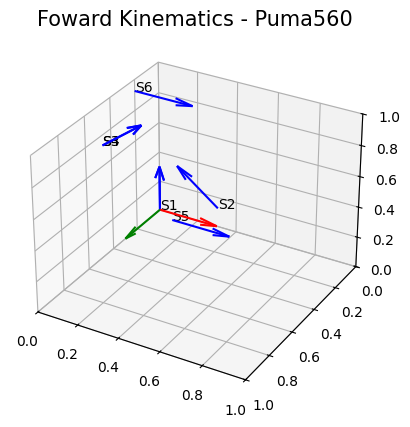

In [ ]:
# === Set-up 3D plot parameters of design ===

# -- Creating the graphical representation --

# Initialize figures in a 3D graphical interface
# Create the figure (and axe pair inside the figure)
fig = plt.figure() #-create Figure type object - remember,classes are referenced with capitals and no underscores are used in names
ax = fig.add_subplot(111, projection ='3d')

# Set axis value limits for the 3D graph 
limit_value = 1 #### Size of plot
ax.set_xlim([0, limit_value])  
ax.set_ylim([limit_value, 0]) 
ax.set_zlim([0, limit_value])

# Plot the robot's origin axes 
origin = np.zeros(3)

x_axis = np.array([[1,0,0]]).T 
y_axis = np.array([[0,1,0]]).T
z_axis = np.array([[0,0,1]]).T
end_origin = np.identity(3) 

# Plotting origin axes x,y,z
print(*x_axis)
print(*y_axis)
print(*z_axis)

ax.quiver(*origin,*x_axis,length=0.3,color="r")
ax.quiver(*origin,*y_axis,length=0.3,color="g")
ax.quiver(*origin,*z_axis,length=0.3,color="b")

ax.set_title("Foward Kinematics - Puma560", fontsize=15)
# Plot the z axis of the joints
for i in range (1,len(Slist)+1): #Since we want to use a iterating number for indexing and not a direct value, this should work for both.
    # Use S and theta up to the joint's number
    # For joints before end_effector, M would be identity matrix 
    M_inside = np.array([[1,0,0,0],
                        [0,1,0,0],
                        [0,0,1,0],
                        [0,0,0,1]])
    if i == len(Slist) - 1:
        M_inside = M
        
    # Calculate the T matrix
    T = foward_kinematics_puma560(Slist[:,0:i], M_inside, thetalist[0:i])
    
    # Access the Rotation matrix (this makes for future implementation easier)
    R_T = T[0:3,0:3]

    # Access the Rotation matrix vectors
    x_vector = R_T[:,0]
    y_vector = R_T[:,1]
    z_vector = R_T[:,2]
    print(z_vector)

    # Access the position vector of the T matrix
    joint_origin = T[0:3,3] #position vector = joint origin
    print(f'iteration {i}')
    print(f'position vector: {joint_origin}')

    # Plot the x,y,z vector/axes
    #ax.quiver(*joint_origin,*x_vector,color='r')
    #ax.quiver(*joint_origin,*y_vector,color='g')
    ax.quiver(*joint_origin,*z_vector,length =0.3,color='b')
    
    ax.text(*joint_origin,f'S{i}')
plt.show()

[1] [0] [0]
[0] [1] [0]
[0] [0] [1]
[0 0 1]
iteration 0
position vector: [0 0 0]
[0. 0. 1.]
iteration 1
position vector: [0. 0. 0.]
[-0.70710678  0.          0.70710678]
iteration 2
position vector: [0.30532871 0.         0.12647129]
[0.70710678 0.         0.70710678]
iteration 3
position vector: [-0.30532871  0.          0.33731639]
[0.70710678 0.         0.70710678]
iteration 4
position vector: [-0.30532871  0.          0.33731639]
[1.00000000e+00 0.00000000e+00 1.99673462e-16]
iteration 5
position vector: [ 0.06544795  0.         -0.04750285]
[1.00000000e+00 0.00000000e+00 1.99673462e-16]
iteration 6
position vector: [-0.12555205  0.          0.76949715]


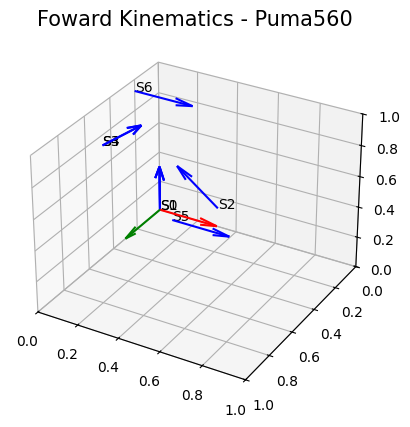

In [ ]:
# =======================================================================
# === (DUPLICATE STARTING FROM 0) Set-up 3D plot parameters of design ===
# =======================================================================

# -- Creating the graphical representation --

# Initialize figures in a 3D graphical interface
# Create the figure (and axe pair inside the figure)
fig = plt.figure() #-create Figure type object - remember,classes are referenced with capitals and no underscores are used in names
ax = fig.add_subplot(111, projection ='3d')

# Set axis value limits for the 3D graph 
limit_value = 1 #### Size of plot
ax.set_xlim([0, limit_value])  
ax.set_ylim([limit_value, 0]) 
ax.set_zlim([0, limit_value])

# Plot the robot's origin axes 
origin = np.zeros(3)

x_axis = np.array([[1,0,0]]).T 
y_axis = np.array([[0,1,0]]).T
z_axis = np.array([[0,0,1]]).T
end_origin = np.identity(3) 

# Plotting origin axes x,y,z
print(*x_axis)
print(*y_axis)
print(*z_axis)

ax.quiver(*origin,*x_axis,length=0.3,color="r")
ax.quiver(*origin,*y_axis,length=0.3,color="g")
ax.quiver(*origin,*z_axis,length=0.3,color="b")

ax.set_title("Foward Kinematics - Puma560", fontsize=15)
# Plot the z axis of the joints
for i in range (0,len(Slist)+1): #Since we want to use a iterating number for indexing and not a direct value, this should work for both.
    # Use S and theta up to the joint's number
    # For joints before end_effector, M would be identity matrix 
    M_inside = np.array([[1,0,0,0],
                        [0,1,0,0],
                        [0,0,1,0],
                        [0,0,0,1]])
    if i == len(Slist) - 1:
        M_inside = M
        
    # Calculate the T matrix
    T = foward_kinematics_puma560(Slist[:,0:i], M_inside, thetalist[0:i])
    
    # Access the Rotation matrix (this makes for future implementation easier)
    R_T = T[0:3,0:3]

    # Access the Rotation matrix vectors
    x_vector = R_T[:,0]
    y_vector = R_T[:,1]
    z_vector = R_T[:,2]
    print(z_vector)

    # Access the position vector of the T matrix
    joint_origin = T[0:3,3] #position vector = joint origin
    print(f'iteration {i}')
    print(f'position vector: {joint_origin}')

    # Plot the x,y,z vector/axes
    #ax.quiver(*joint_origin,*x_vector,color='r')
    #ax.quiver(*joint_origin,*y_vector,color='g')
    ax.quiver(*joint_origin,*z_vector,length =0.3,color='b')
    
    ax.text(*joint_origin,f'S{i}')
plt.show()

### ✍️ Requirements:

- You may use the `modern_robotics` Python package or manually implement `MatrixExp6()` and `FKinSpace()` from scratch for full credit.
- Include internal comments.
- Include a **unit test or validation** by checking that `T` is a valid SE(3) transformation (rotation matrix orthonormality and determinant ≈ 1).
- Bonus: Visualize the origin and z-axes of each joint using `matplotlib` or `plotly`.

---

---

## 🧠 PART 3: OOP + NumPy Integration – Sensor Array Analysis (35 pts)

Build a reusable system to handle and analyze sensor arrays in a robot.

### 🎯 Objectives:

- Define a `SensorArray` class with:
    - A NumPy matrix of shape (n_samples × n_sensors)
    - Method `filter_noise(threshold)` that:
        - Zeroes out values above a threshold
    - Method `normalize()` that scales data between 0 and 1

### 🧪 Create a subclass `HeatmapSensorArray` that:

- Inherits from `SensorArray`
- Adds a method `generate_heatmap()` that uses **Matplotlib** to visualize the filtered data

Use the following simulated data:

In [ ]:
# Simulated data to utilize
np.random.seed(99)
data = np.random.rand(50, 8) * 150  # 50 time samples × 8 sensors

- Filter values above 120
- Normalize
- Generate the heatmap

---

## TASK 3 - Solution 

In [ ]:
# Import necessary dependecies
import numpy as np #for numeric manipulation
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
# Simulated data to utilize
np.random.seed(99)
data = np.random.rand(50, 8) * 150  # 50 time samples × 8 sensors

In [ ]:
# Concrete SensorArray class
class SensorArray():
    """
    A class for storing, filtering and normalizing sensor data arrays.
    
    Inputs:
        data_matrix (numpy.ndarray): Matrix of n_samples x n_sensors, for sensor data. 
        
        (Structured in this way: sample_data × n_sensors).
        
        Example:
                |-Sensor1-|-Sensor2-|-Sensor3-|
        sample1 |  data1  |  data1  |  data1  |
        sample2 |  data2  |  data2  |  data2  |
        sample3 |  data3  |  data3  |  data3  |
       
    Attributes:
        data_matrix (numpy.ndarray): '''
        
    
    Methods:
        filter_noise(threshold): Filters data above the set threshold; substitues them with zero.
        normalize(): Scales the all the data in the data matrix between 0 and 1.
    """

    def __init__(self,data_matrix):
        """
        Initializes a SensorArray instance.

        Inputs:
        data_matrix (numpy.ndarray): Matrix of n_samples x n_sensors, for sensor data. 
        
        (Structured in this way: sample_data × n_sensors).
        
        Example input:
                |-Sensor1-|-Sensor2-|-Sensor3-|
        sample1 |  data1  |  data1  |  data1  |
        sample2 |  data2  |  data2  |  data2  |
        sample3 |  data3  |  data3  |  data3  |
        
        """
        self.data_matrix = data_matrix #Stores original data here, always accesible.

    
    def filter_noise(self,threshold):
        """
        Filters the values above the specified threshold; substitutes them with zero.

        Inputs:
            threshold (int/float): Limit of acceptable value for data in the array.

        Returns:
            filtered_data (numpy.ndarray): Filtered data matrix; all values below threshold.
        """
        # Since python works on the basis of labels, if its a mutable object, the variables do not create new objects
        # it just adds more labels to the same object and more ways to access and change that object through.
        # Using a mutation method, so to not permanently change the input matrix, create an object copy.
        matrix = self.data_matrix.copy()

        # Logical indexing; sets values above threshold as 0
        # Establishes condition for any value in the array to be bigger than threshold value
        condition = matrix > threshold
        
        # For any value in the matrix that is TRUE for the condition, set as 0 (evaluates the matrix values one by one, true or false)
        # Indexes each TRUE value and sets it as zero in the original matrix, since using =
        matrix[condition] = 0
        return matrix #Final filtered data
        
        
    def normalize(self):
        """
        Normalizes the data; scales the data between 0 and 1.
    
        Returns:
            normalized_data (numpy.ndarray): Scaled data matrix between 0 and 1.
        """
        # Use the data normalization equation      
        min_value = self.data_matrix.min() 
        max_value = self.data_matrix.max()
        normalized_data = (self.data_matrix - min_value) / (max_value - min_value)
        return normalized_data 

In [ ]:
# Subclass - HeatmapSensorArray
class HeatmapSensorArray(SensorArray):
    """
    A class for generating heatmaps from sensor data arrays.

    Works with filtered and unfiltered data.
    Inherits from SensorArray class.
    
    Inputs:
        data_matrix (numpy.ndarray): Matrix of n_samples x n_sensors, for sensor data. 
        
        (Structured in this way: sample_data × n_sensors).
        
        Example:
                |-Sensor1-|-Sensor2-|-Sensor3-|
        sample1 |  data1  |  data1  |  data1  |
        sample2 |  data2  |  data2  |  data2  |
        sample3 |  data3  |  data3  |  data3  |
       
    Attributes:
        data_matrix (numpy.ndarray): ''' 
    
    Methods:
        generate_heatmap(threshold): Generates heatmap with sensor array data.

    Methods (inherited from SensorArray class):
        filter_noise(threshold): Filters data above the set threshold; substitues them with zero.
        normalize(): Scales the all the data in the data matrix between 0 and 1. 
    """
    def generate_heatmap(self):
        """
        Generates heatmap; filters and normalizes sensor array data for it.
        """
        filtered_data = self.filter_noise(120)
        filtered_inst = HeatmapSensorArray(filtered_data) #Filtered data custom class object instantiation
        normalized_data = filtered_inst.normalize()
        fig, ax = plt.subplots(figsize=(7, 6)) #Setting the size of the figure 7" x 6" (inches)
        heatmap = ax.imshow(normalized_data,aspect='auto') #aspect to auto depending the plot generate, is the fig size
        color_bar = fig.colorbar(heatmap, ax=ax)
        
        #Add graph title
        ax.set_title("Heatmap for Collected Sensor Array Data \n")
        
        #Add axis labels
        ax.set_xlabel("Sensor Number")
        ax.set_ylabel("Sample Number")

        #To make the heatmap more visualy pleasing 
        fig.subplots_adjust(left=0.2,right=0.55,bottom=0.1,top=0.9)
        plt.show()
        fig.savefig("HeatmapFigfinal")

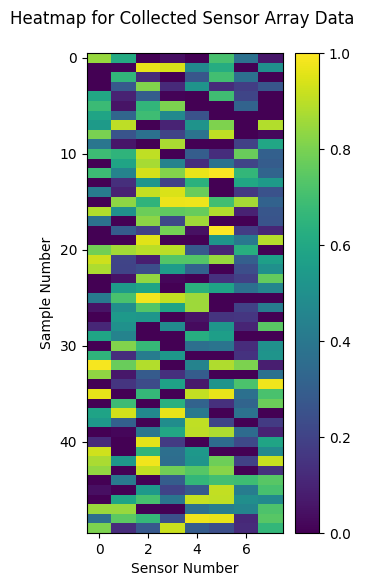

In [ ]:
# Testing Output Heatmap
x = HeatmapSensorArray(data)
x.generate_heatmap()
# The output given by jupyter notebook is formated and sized different to the actual
# generated graph.

## 🧩 BONUS (Optional, 10 pts)

Develop a basic **Inverse Kinematics Solver** for a 2-link robotic arm (non-trivial case):

- Inputs: `x_target`, `y_target`, link lengths `L1`, `L2`
- Use cosine law to find `θ2`, then `θ1`
- Return angles (in degrees), and raise a `ValueError` if the target is unreachable

In [ ]:
import numpy as np

In [ ]:
# Define the custom errors
class ValueError(Exception):
    pass

In [ ]:
def inverse_kinematics_solver(x_target,y_target,L1,L2):
    """
    Basic inverse kinematics solver for a 2-link robotic arm; for non trivial case.
    
    Args:
        x_target (int/float): Target position in x coordinates
        y_target (int/float): Target position in y coordinates
        L1 (int/float): Length of link 1
        L2 (int/float): Length of link 2

    Returns:
        theta1, theta2 (float64): Required angles to reach input target positions, in degrees. 
           
    Raises:
        ValueError: If the target position is unreachable; outside of workspace.
    """
    # Before evaluating anything, verify if position is possible or
    # the math breaks due to cosine (Raise error if not possible)

    ## Verify if target is unreachable with length of links versus target position:
    # Calculate maximum reach of end-effector 
    max_reach = L1 + L2

    # Calculate minimum reach - when they overlap (Researched)
    min_reach = abs(L1 - L2)
    
    # Compare to magnitud of target position (r in this case) - define ValueError run conditions
    target_mag = np.sqrt(x_target**2 + y_target**2)
    if target_mag > max_reach or target_mag < min_reach:
        raise ValueError(f"Target ({x_target},{y_target}) is unreachable.")
        
    # Since there are no limits in achivable angles, 
    # this seems to be the only limit to the workspace
    
    ### Continues calculations if ValueError is not raised:
    # Calculate hipotenuse of triangle made by x_target and y_target
    r = np.sqrt(x_target**2 + y_target**2)
    
    ## Use cosine rule to find theta2 (remember calcs are done in radians):
    # Calculate value of beta with cosine rule and r, L1, L2. 
    # Convert to degrees to calculate with normal angles
    beta = np.rad2deg(np.arccos((r**2 - L1**2 - L2**2) / (-2 * L1 * L2)))
    
    # Calculate theta2 with Beta
    theta2 = 180 - beta

    ## Use cosine rule to calculate theta1:
    # Calculate value of alfa with cosine rule and r, L1, L2.
    # Convert to degrees to calculate with normal angles
    alfa = np.rad2deg(np.arccos((L2**2 - r**2 - L1**2) / (-2 * r * L1)))

    # Calculate value of gamma with trig functions for right triangles,
    # with x_target and y_target.
    gamma = np.rad2deg(np.arctan(y_target / x_target))
    
    # Find theta2 with alfa and gamma
    theta1 = gamma - alfa
    
    ## In a real-world case, this part would command to move the real robot
    ## to the target position, if ValueError is not presented.
    print(f"Robot requires theta_1: {theta1}*, theta_2: {theta2}* to obtain the position of ({x_target},{y_target})")
    # Here, ideally, we would set the motors to the calculated angles, since the target is posible.
    
    return theta1, theta2 

### Testing Outputs - Test Results:

In [ ]:
# Testing Data - For easy changing of the values (no dealing with the input function)
# Correct Case Example Data
x_target = 1
y_target = 3
L1 = 3
L2 = 2

In [ ]:
# Testing Data - For easy changing of the values (no dealing with the input function)
# Error Case Example Data
x_target = 5.5
y_target = 0
L1 = 3
L2 = 2

In [ ]:
# Run the function, collect the results - Application level Code 
try:
    theta1,theta2 = inverse_kinematics_solver(x_target,y_target,L1,L2)
except ValueError as e: 
    print("Error:",e)
    theta1,theta2 = 0,0

Robot requires theta_1: 33.80380727004296*, theta_2: 104.47751218592991* to obtain the position of (1,3)


<br>
To more easily test if the inverse kinematics solver is working, this graphical demonstration was programmed, with help of 
a stack overflow code for applying an angle to a plotted line (code was modified, but still mostly whole).<br>
I took this liberty since this code is for vizualization of the actual bonus code, and just for easier verification 
(instead of drawing by hand).<br>
The rest is my own code; the code from stack overflow is labeled and was modified in removing some parts (now in commentary) and in adding
the return, so that line two can take its starting point from the end point of line 1, which is calculated inside the function,
with the applied angle.
Also the code for setting x,y limits was taken from the stack overflow code and moved outside the function, but this code was modified to use magnitude + 1. (The change can be seen, since the original is still in the overflow code, just in the comments).

In [ ]:
# IMPORTED FROM STACK OVERFLOW - https://stackoverflow.com/a/28441909/30860969 - By veda905, edited by JOH
import numpy as np
import math
import matplotlib.pyplot as plt


def plot_point(point, angle, length):
     '''
     point - Tuple (x, y)
     angle - Angle you want your end point at in degrees.
     length - Length of the line you want to plot.

     Will plot the line on a 10 x 10 plot.
     '''

     # unpack the first point
     x, y = point

     # find the end point
     endy = y + length * math.sin(math.radians(angle))
     endx = x + length * math.cos(math.radians(angle))

     # plot the points
     #fig = plt.figure()
     #ax = plt.subplot(111)
     #ax.set_ylim([0, 10])   # set the bounds to be 10, 10
     #ax.set_xlim([0, 10])   
     ax.plot([x, endx], [y, endy], color='blue',ms=6)
     return (endx,endy) #parentesis make it a tuple?

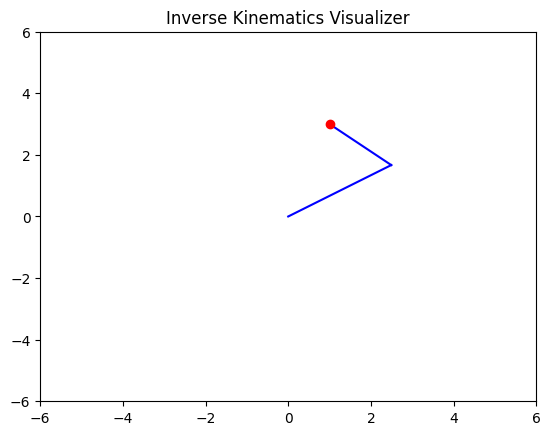

In [ ]:
# -- TO TEST FUNCTION, DRAWING THE ROBOT IN PLOT --

# Drawing for testing
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

# Set Plot limits
max_reach = L1 + L2
mag = np.sqrt(x_target**2 + y_target**2)
ax.set_xlim([-max_reach - 1, max_reach + 1])  
ax.set_ylim([-max_reach - 1, max_reach + 1])
    
# Plot first point from origin of plot
point1 = (0,0) #tuple

# Made the function return the endpoints calculated, so that next link position is know
point2 = plot_point(point1,theta1,L1)

# Plot link 2 with its angle
plot_point(point2,theta1 + theta2,L2) #Since theta2 was defined FROM L1, need to add the angle, since these seem to assume horizontal alwaus

# Plot target
ax.plot(x_target,y_target, marker='o',color='red',)

# Add the title
ax.set_title("Inverse Kinematics Visualizer")

plt.show() #So that the internal code doesnt appear and is compatible to other plaforms